In [1]:
#pip3 install google.colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

###  Libraries

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

import torch

import os
import sys

from MLP import MLP
from Datasets.Datasets_Functions import *
from Visualization import Visualization
from Evaluations.Evaluation import Evaluator

/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Global Variables

In [3]:
path_to_module = './' # 'C:\\Users\\PAPASOFT INC\\Desktop\\SOFT_SIL'
sys.path.append(path_to_module)
os.environ['OMP_NUM_THREADS'] = '6'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

### Visualization

In [4]:
visualization = Visualization()

### Load datasets

In [5]:
hashmap_path = path_to_module + 'Datasets/'
hashmap = get_hashmap(hashmap_path)
#for key in hashmap.keys():
    #update_outer_hashmap(hashmap[dataset_name],path_to_module)
    #delete_from_inner_hashmap([key,'option_name'],path_to_module)
print(hashmap.keys())

dataset_name = 'r3'
dataset_properties = hashmap[dataset_name]
print(dataset_properties)

batch_size = dataset_properties['batch_size'] #= 30
n_clusters = dataset_properties['n_clusters'] #= 3
dataloader, input_dim, data_np, labels = function_get_dataset(dataset_name, dataset_properties)

print('Data_Shape is:', input_dim)
print('Batches Number is:', len(dataloader))

dict_keys(['tcga', 'emnist_balanced_letters', 'emnist_mnist', 'emnist_balanced_digits', 'dermatology', 'ecoil', 'iris', 'rings', 'wine', 'australian', 'moons', 'squeezed_gauss', 'gauss_densities', 'pendigits', 'fashionmnist', '3dspheres', '20_newsgroups', 'coil20', 'cifar10', 'stl10', 'r15', 'r3'])
{'batch_size': 100, 'n_clusters': 3, 'module_name': 'Datasets.Datasets'}
Data_Shape is: 2
Batches Number is: 15


### Parameters

In [6]:
# Batch Size and Number of Clusters
batch_size = dataset_properties['batch_size']
n_clusters = dataset_properties['n_clusters']

# Training Epochs and Learning Rate
lr = 1e-3
n_epochs = 100
entr_lambda = 1

kmeans_initialization = True

### Create MLP model

In [7]:
mlp = MLP(device=device, n_clusters=n_clusters, input_dim=input_dim)
mlp.set_training_variables(dataloader=dataloader, batch_size=batch_size, n_epochs=n_epochs, lr=lr, entr_lambda=entr_lambda)
mlp.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
mlp.set_path()

mlp = mlp.to(device)

### Initialize the clustering layer using k-means

In [8]:
n_inits = 10
if kmeans_initialization: mlp.kmeans_initialization(n_inits)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa0a576e440>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa0a576e440>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


### Training the MLP

In [9]:
data, labels, clustering = mlp.train()
cluster_centers = mlp.get_clustering_layer_centers().cpu().detach().numpy()
data_dir_path = mlp.data_dir_path

Epoch: 0 Cl Loss: 14.4414 Entropy: 20.2181 Soft Sil: 0.5586 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 1 Cl Loss: 14.4790 Entropy: 19.9684 Soft Sil: 0.5210 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 2 Cl Loss: 14.2446 Entropy: 19.7194 Soft Sil: 0.7554 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 3 Cl Loss: 14.2730 Entropy: 19.4692 Soft Sil: 0.7270 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 4 Cl Loss: 14.1409 Entropy: 19.2217 Soft Sil: 0.8591 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 5 Cl Loss: 14.0178 Entropy: 18.9739 Soft Sil: 0.9822 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 6 Cl Loss: 14.0313 Entropy: 18.7268 Soft Sil: 0.9687 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 7 Cl Loss: 13.8175 Entropy: 18.4871 Soft Sil: 1.1825 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 8 Cl Loss: 13.7474 Entropy: 18.2477 Soft Sil: 1.2526 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 AR

Epoch: 76 Cl Loss: 9.4025 Entropy: 9.4724 Soft Sil: 5.5975 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 77 Cl Loss: 9.3718 Entropy: 9.4494 Soft Sil: 5.6282 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 78 Cl Loss: 9.3156 Entropy: 9.4271 Soft Sil: 5.6844 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 79 Cl Loss: 9.4315 Entropy: 9.4045 Soft Sil: 5.5685 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 80 Cl Loss: 9.4263 Entropy: 9.3846 Soft Sil: 5.5737 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 81 Cl Loss: 9.4362 Entropy: 9.3664 Soft Sil: 5.5638 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 82 Cl Loss: 9.5488 Entropy: 9.3483 Soft Sil: 5.4512 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 83 Cl Loss: 9.3152 Entropy: 9.3331 Soft Sil: 5.6848 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
Epoch: 84 Cl Loss: 9.2419 Entropy: 9.3165 Soft Sil: 5.7581 SIL: 0.0000 ACC: 1.00 PUR: 1.00 NMI: 1.00 ARI: 1.00
E

### $k$-means evaluation

In [10]:
kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
evaluator = Evaluator()
evaluator.evaluate_model(data, labels, kmeans.labels_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa0b4e72440>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa1b37fc0d0>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(1.0, 1.0, 1.0, 1.0, 0)

/home/geo/Desktop/Soft-Silhouette/Visualization.py:70: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(cluster_centers[:n_clusters, 0], cluster_centers[:n_clusters, 1], c='red', marker='x', s=500, edgecolors='black', label='Cluster Centers')


Directory './Results/r3/MLP/100_Eps_out_3_bs_100_lr_0.001_entr_lambda_1/Experiments/No_TSNE' already exists.


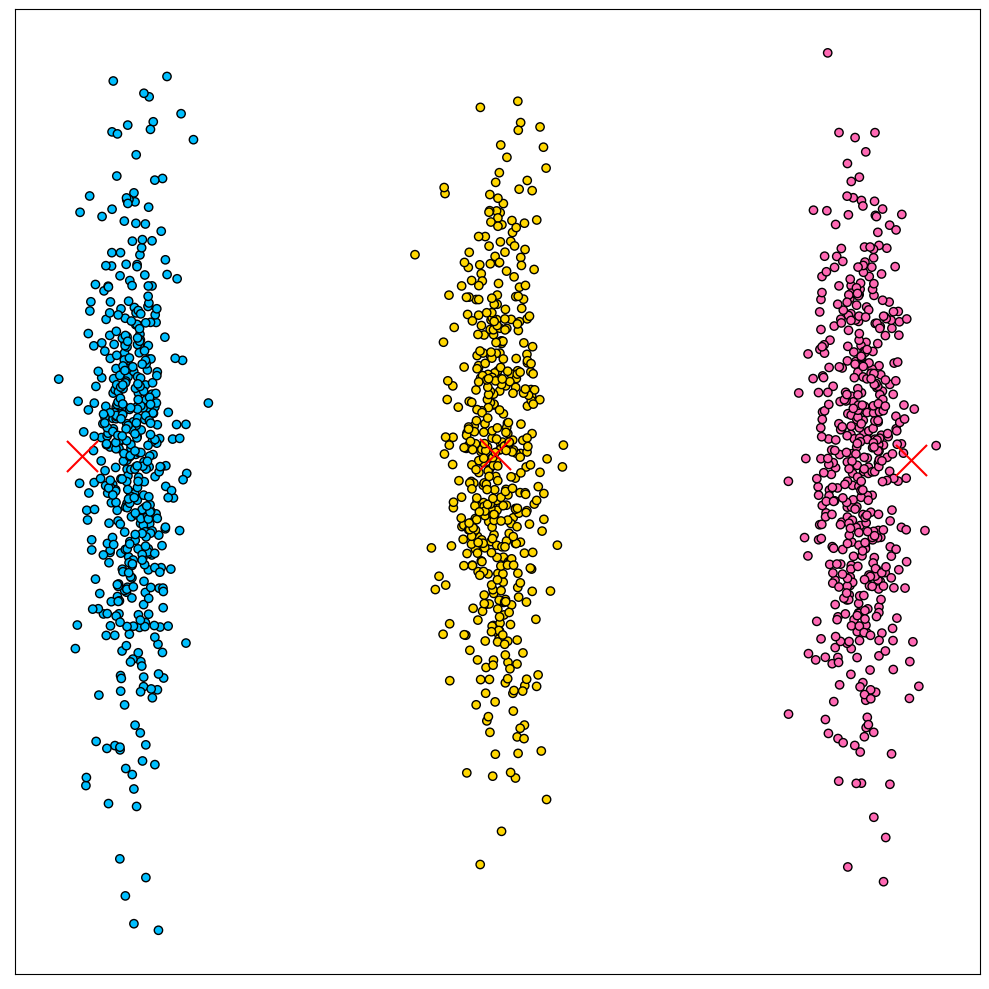

In [11]:
visualization.plot(data, labels, clustering, cluster_centers, mlp.data_dir_path)

In [12]:
#visualization.makeExcel()
#visualization.plot_tsne(mlp=True)